In [1]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Xuyên suốt phần lớn cuốn sách này, ta đã nói về việc làm thế nào để thực hiện những dự đoán. Ở dưới dạng nào đi nữa, ta đã cho mạng nơ-ron sâu học cách ánh xạ từ các mẫu dữ liệu sang các nhãn. Kiểu học này được gọi là học phân biệt, ví dụ như phân biệt ảnh chó và mèo. Phân loại và hồi quy là hai ví dụ của việc học phân biệt. Mạng nơ-ron được huấn luyện bằng phương pháp lan truyền ngược đã đảo lộn mọi thứ ta từng biết về học phân biệt trên các tập dữ liệu lớn phức tạp. Độ chính xác của tác vụ phân loại ảnh có độ phân giải cao đã đạt tới mức độ như người (với một số điều kiện) từ chỗ không thể sử dụng được chỉ trong 5-6 năm gần đây. May mắn cho bạn, sẽ không có một bài diễn thuyết nữa về các tác vụ phân biệt khác mà ở đó mạng nơ-ron sâu thực hiện tốt một cách đáng kinh ngạc.

Nhưng học máy còn làm được nhiều hơn là chỉ giải quyết các tác vụ phân biệt. Chẳng hạn, với một tập dữ liệu không nhãn cho trước, ta có thể xây dựng một mô hình nắm bắt chính xác các đặc tính của tập dữ liệu này. Với một mô hình như vậy, ta có thể tổng hợp ra các mẫu dữ liệu mới giống như phân phối của dữ liệu dùng để huấn luyện. Ví dụ, với một kho lớn dữ liệu ảnh khuôn mặt cho trước, ta có thể tạo ra một ảnh như thật, giống như nó được lấy từ cùng tập dữ liệu. Kiểu học này được gọi là mô hình hóa tác vụ sinh (generative modelling).

Cho đến gần đây, ta không có phương pháp nào để có thể tổng hợp các ảnh mới như thật. Nhưng thành công của mạng nơ-ron sâu với học phân biệt đã mở ra những khả năng mới. Một xu hướng lớn trong hơn ba năm vừa qua là việc áp dụng mạng sâu phân biệt để vượt qua các thách thức trong các bài toán mà nhìn chung không được xem là học có giám sát. Các mô hình ngôn ngữ mạng nơ-ron hồi tiếp là một ví dụ về việc sử dụng một mạng phân biệt (được huấn luyện để dự đoán ký tự kế tiếp) mà một khi được huấn luyện có thể vận hành như một mô hình sinh.

Trong năm 2014, có một bài báo mang tính đột phá đã giới thiệu Mạng đối sinh (Generative Adversarial Network - GAN) [Goodfellow et al., 2014], một phương pháp khôn khéo tận dụng sức mạnh của các mô hình phân biệt để có được các mô hình sinh tốt. Về cốt lõi, GAN dựa trên ý tưởng là một bộ sinh dữ liệu là tốt nếu ta không thể chỉ ra đâu là dữ liệu giả và đâu là dữ liệu thật. Trong thống kê, điều này được gọi là bài kiểm tra từ hai tập mẫu - một bài kiểm tra để trả lời câu hỏi liệu tập dữ liệu $X=\{x_1,\ldots, x_n\}$ và $X'=\{x'_1,\ldots, x'_n\}$
  có được rút ra từ cùng một phân phối. Sự khác biệt chính giữa hầu hết những bài nghiên cứu thống kê và GAN là GAN sử dụng ý tưởng này theo kiểu có tính cách xây dựng. Nói cách khác, thay vì chỉ huấn luyện một mô hình để nói “này, hai tập dữ liệu này có vẻ như không đến từ cùng một phân phối”, thì chúng sử dụng phương pháp kiểm tra trên hai tập mẫu để cung cấp tín hiệu cho việc huấn luyện cho một mô hình sinh. Điều này cho phép ta cải thiện bộ sinh dữ liệu tới khi nó sinh ra thứ gì đó giống như dữ liệu thực. Ở mức tối thiểu nhất, nó cần lừa được bộ phân loại, kể cả nếu bộ phân loại của ta là một mạng nơ-ron sâu tân tiến nhất.

  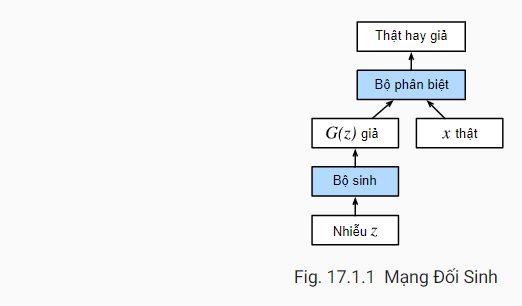

Kiến trúc của mạng đối sinh được miêu tả trong hình Fig. 17.1.1. Như ta có thể thấy, có hai thành phần trong kiến trúc của GAN - đầu tiên, ta cần một thiết bị (giả sử, một mạng sâu nhưng nó có thể là bất kỳ thứ gì, chẳng hạn như công cụ kết xuất đồ họa trò chơi) có khả năng tạo ra dữ liệu giống thật. Nếu ta đang làm việc với hình ảnh, mô hình cần tạo ra hình ảnh. Nếu ta đang làm việc với giọng nói, mô hình cần tạo ra được chuỗi âm thanh, v.v. Ta gọi mô hình này là mạng sinh (generator network). Thành phần thứ hai là mạng phân biệt (discriminator network). Nó cố gắng phân biệt dữ liệu giả và thật. Cả hai mạng này sẽ cạnh tranh với nhau. Mạng sinh sẽ cố gắng đánh lừa mạng phân biệt. Đồng thời, mạng phân biệt sẽ thích nghi với dữ liệu giả vừa mới tạo ra. Thông tin thu được sẽ được dùng để cải thiện mạng sinh, và cứ tiếp tục như vậy.

Mạng phân biệt là một bộ phân loại nhị phân nhằm phân biệt xem đầu vào $x$ là thật (từ dữ liệu thật) hoặc giả (từ mạng sinh). Thông thường, đầu ra của mạng phân biệt là một số vô hướng $o∈R$ dự đoán cho đầu vào  $x$, chằng hạn như sử dụng một tầng kết nối đầy đủ với kích thước ẩn 1 và sau đó sẽ được đưa qua hàm sigmoid để nhận được xác suất dự đoán $D(x)=1/(1+e^{−o})$. Giả sử nhãn $y$ cho dữ liệu thật là $1$ và $0$ cho dữ liệu giả. Ta sẽ huấn luyện mạng phân biệt để cực tiểu hóa mất mát entropy chéo, nghĩa là,

$$
\min_D \{ - y \log D(\mathbf x) - (1-y)\log(1-D(\mathbf x)) \},
$$

Đối với mạng sinh, trước tiên nó tạo ra một vài tham số ngẫu nhiên  $z∈R^d$ từ một nguồn, ví dụ, phân phối chuẩn $\mathbf z \sim \mathcal{N} (0, 1)$. Ta thường gọi $z$ như là một biến tiềm ẩn. Mục tiêu của mạng sinh là đánh lừa mạng phân biệt để phân loại $x′=G(z)$ là dữ liệu thật, nghĩa là, ta muốn $D(G(z))≈1$. Nói cách khác, cho trước một mạng phân biệt $D$, ta sẽ cập nhật tham số của mạng sinh $G$ nhằm cực đại hóa mất mát entropy chéo khi  $y=0$, tức là,
$$
\max_G \{ - (1-y) \log(1-D(G(\mathbf z))) \} = \max_G \{ - \log(1-D(G(\mathbf z))) \}.
$$

Nếu như mạng sinh làm tốt, thì $D(x′)≈1$ để mất mát gần 0, kết quả là các gradient sẽ trở nên quá nhỏ để tạo ra được sự tiến bộ đáng kể cho mạng phân biệt. Vì vậy, ta sẽ cực tiểu hóa mất mát như sau:
$$
\min_G \{ - y \log(D(G(\mathbf z))) \} = \min_G \{ - \log(D(G(\mathbf z))) \},
$$
trong đó chỉ đưa $x′=G(z)$ vào mạng phân biệt nhưng cho trước nhãn $y=1$.

Nói tóm lại, $D$ và $G$ đang chơi trò “minimax” (cực tiểu hóa cực đại) với một hàm mục tiêu toàn diện như sau:
$$
min_D max_G \{ -E_{x \sim \text{Data}} log D(\mathbf x) - E_{z \sim \text{Noise}} log(1 - D(G(\mathbf z))) \}.
$$

Rất nhiều ứng dụng của GAN liên quan tới hình ảnh. Để ví dụ, chúng ta sẽ bắt đầu với việc khớp một phân phối đơn giản trước. Ta sẽ minh họa bằng việc cho thấy việc gì sẽ xảy ra nếu sử dụng GAN để tạo một bộ ước lượng kém hiệu quả nhất thế giới cho một phân phối Gauss. Hãy tiến hành nào.

In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# 20.1.1. Tạo một số dữ liệu "thực"

Vì đây có thể là một ví dụ nhàm chán nhất, ta chỉ đơn giản sinh dữ liệu lấy từ một phân phối Gauss.

In [ ]:
X = torch.normal(0.0, 1, (1000, 2))
A = torch.tensor([[1, 2], [-0.1, 0.5]])
b = torch.tensor([1, 2])
data = torch.matmul(X, A) + b

Dựa vào đoạn mã trên, dữ liệu này là một phân phối Gauss được dịch chuyển một cách tùy ý với trung bình $b$ và ma trận hiệp phương sai $A^TA$.

The covariance matrix is
tensor([[1.0100, 1.9500],
        [1.9500, 4.2500]])


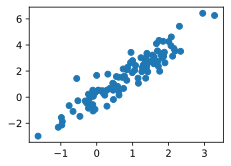

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(data[:100, 0].detach().numpy(), data[:100, 1].detach().numpy());
print(f'The covariance matrix is\n{torch.matmul(A.T, A)}')

In [ ]:
batch_size = 8
data_iter = d2l.load_array((data,), batch_size)
next(iter(data_iter))[0].shape

torch.Size([8, 2])

20.1.2. Bộ Sinh
Bộ sinh sẽ là một mạng đơn giản nhất có thể - một mô hình tuyến tính đơn tầng. Đó là vì chúng ta sẽ sử dụng mạng tuyến tính này cùng với bộ sinh dữ liệu từ phân phối Gauss. Vậy nên, nó chỉ cần học những tham số của phân phối này để làm giả dữ liệu một cách hoàn hảo.



In [ ]:
net_G = nn.Sequential(nn.Linear(2, 2)) #Input = 2, output = 2
net_G

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
)

20.1.3. Bộ phân biệt
Đối với bộ phân biệt, nó sẽ hơi khác một chút: ta sẽ sử dụng một MLP 3 tầng để khiến mọi thứ trở nên thú vị hơn.


In [ ]:
net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))
net_D

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=3, bias=True)
  (3): Tanh()
  (4): Linear(in_features=3, out_features=1, bias=True)
)

20.1.4. Training
Đầu tiên, ta định nghĩa một hàm để cập nhật bộ phân biệt.

In [ ]:
def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

Bộ sinh cũng được cập nhật theo cách tương tự. Ở đây, ta sử dụng lại làm mất mát entropy chéo nhưng thay nhãn của dữ liệu giả từ $0$
 thành $1$.

In [ ]:

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

Cả bộ phân biệt lẫn bộ sinh hoạt động như một bộ hồi quy logistic nhị phân với mất mát entropy chéo. Ta sử dụng Adam để làm mượt quá trình huấn luyện. Với mỗi lần lặp, đầu tiên ta cập nhật bộ phân biệt và sau đó đến bộ sinh. Ta sẽ theo dõi cả giá trị mất mát lẫn những dữ liệu được sinh ra.

In [ ]:
def train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs], nrows=2, figsize=(5, 5),
                            legend=['discriminator', 'generator'])
    animator.fig.subplots_adjust(hspace=0.3)
    for epoch in range(num_epochs):
        # Train one epoch
        timer = d2l.Timer()
        metric = d2l.Accumulator(3)  # loss_D, loss_G, num_examples
        for (X,) in data_iter:
            batch_size = X.shape[0]
            Z = torch.normal(0, 1, size=(batch_size, latent_dim))
            metric.add(update_D(X, Z, net_D, net_G, loss, trainer_D),
                       update_G(Z, net_D, net_G, loss, trainer_G),
                       batch_size)
        # Visualize generated examples
        Z = torch.normal(0, 1, size=(100, latent_dim))
        fake_X = net_G(Z).detach().numpy()
        animator.axes[1].cla()
        animator.axes[1].scatter(data[:, 0], data[:, 1])
        animator.axes[1].scatter(fake_X[:, 0], fake_X[:, 1])
        animator.axes[1].legend(['real', 'generated'])
        # Show the losses
        loss_D, loss_G = metric[0]/metric[2], metric[1]/metric[2]
        animator.add(epoch + 1, (loss_D, loss_G))
    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec')

loss_D 0.693, loss_G 0.693, 1571.8 examples/sec


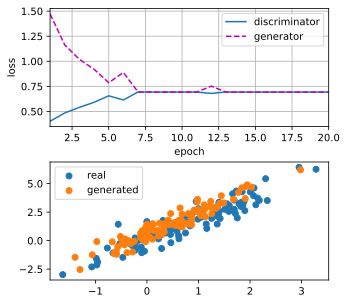

In [ ]:
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 20
train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G,
      latent_dim, data[:100].detach().numpy())